In [94]:
!pip install distfit

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from distfit import distfit

In [96]:
archivo = "DT_CAFSR2.xlsx"
try:
    df = pd.read_excel(archivo)
except FileNotFoundError:
    print("Error: Sube el archivo DTCAFSR.xlsx")

df.head()

,N°,FECHA,MES,AÑO,TIPO_DE_VEHÍCULO,PLACA,PAX,FECHA_HORA_INGRESO_AL_CAFSR,PDI_FECHA_HORA_INICIO,PDI_FECHA_HORA_FIN,...,CV_ADU_FECHA_HORA_FIN,DEMORA_CV_ADU,SEN_FECHA_HORA_INICIO,SEN_FECHA_HORA_FIN,DEMORA_SEN,REVI_FECHA_HORA_INICIO,REVI_FECHA_HORA_FIN,DEMORA_REVI,HORA_DE_SALIDA_DEL_CAFSR,Tiempo_Total
0,1,2025-09-12,2,2025,C,1,4,2025-09-12 00:01:00,2025-09-12 00:08:00,2025-09-12 00:13:00,...,2025-09-12 00:45:00,00:21:00,2025-09-12 00:45:00,2025-09-12 00:48:00,00:03:00,2025-09-12 00:48:00,2025-09-12 00:51:00,00:03:00,2025-09-12 00:52:00,00:51:00
1,2,2025-09-12,2,2025,C,2,5,2025-09-12 00:07:00,2025-09-12 00:18:00,2025-09-12 00:38:00,...,2025-09-12 01:16:00,00:28:00,2025-09-12 01:16:00,2025-09-12 01:18:00,00:02:00,2025-09-12 01:18:00,2025-09-12 01:20:00,00:02:00,2025-09-12 01:22:00,01:15:00
2,3,2025-09-12,2,2025,P,3,4,2025-09-12 00:10:00,2025-09-12 00:19:00,2025-09-12 00:38:00,...,2025-09-12 01:11:00,00:23:00,2025-09-12 01:11:00,2025-09-12 01:13:00,00:02:00,2025-09-12 01:13:00,2025-09-12 01:15:00,00:02:00,2025-09-12 01:18:00,01:08:00
3,4,2025-09-12,2,2025,P,4,4,2025-09-12 00:12:00,2025-09-12 00:23:00,2025-09-12 00:41:00,...,2025-09-12 01:16:00,00:23:00,2025-09-12 01:16:00,2025-09-12 01:19:00,00:03:00,2025-09-12 01:19:00,2025-09-12 01:22:00,00:03:00,2025-09-12 01:23:00,01:11:00
4,5,2025-09-12,2,2025,B,5,30,2025-09-12 00:13:00,2025-09-12 00:15:00,2025-09-12 00:18:00,...,2025-09-12 00:30:00,00:02:00,2025-09-12 00:30:00,2025-09-12 00:53:00,00:23:00,2025-09-12 00:53:00,2025-09-12 00:56:00,00:03:00,2025-09-12 00:59:00,00:46:00


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   N°                           635 non-null    int64         
 1   FECHA                        635 non-null    datetime64[ns]
 2   MES                          635 non-null    int64         
 3   AÑO                          635 non-null    int64         
 4   TIPO_DE_VEHÍCULO             635 non-null    object        
 5   PLACA                        635 non-null    int64         
 6   PAX                          635 non-null    int64         
 7   FECHA_HORA_INGRESO_AL_CAFSR  635 non-null    datetime64[ns]
 8   PDI_FECHA_HORA_INICIO        635 non-null    datetime64[ns]
 9   PDI_FECHA_HORA_FIN           635 non-null    datetime64[ns]
 10  DEMORA_PDI                   635 non-null    object        
 11  MIGRA_FECHA_HORA_INICIO      635 non-null    

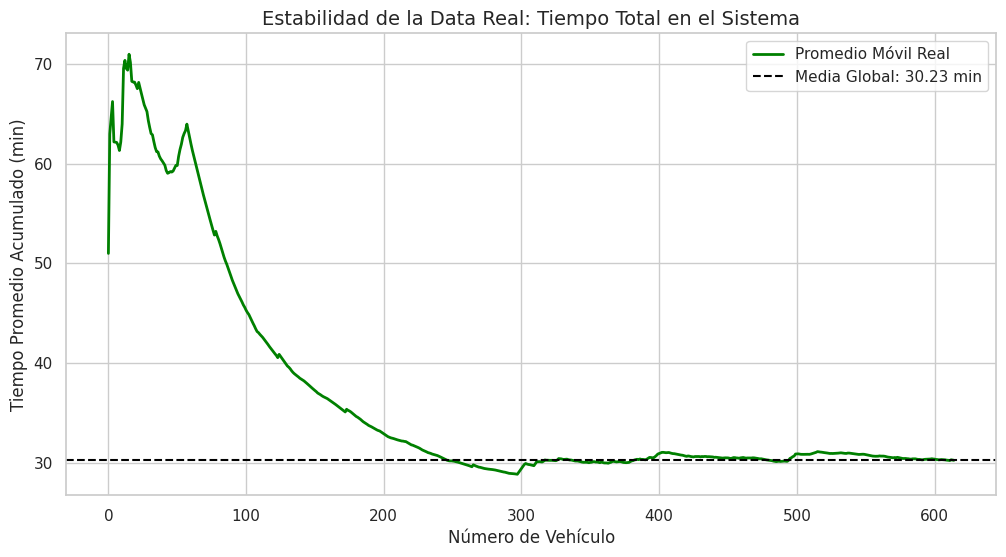

Tiempo Promedio Real Final: 30.23 minutos


In [98]:
def procesar_tiempo_minutos(val):
    try:
        if isinstance(val, str):
            val = val.strip()
            if val == "": return None
            h, m, s = map(int, val.split(':'))
            return h*60 + m + s/60.0
        if isinstance(val, datetime.time):
            return val.hour*60 + val.minute + val.second/60.0
    except:
        return None
    return None

df['Tiempo_Total_min'] = df['Tiempo_Total'].apply(procesar_tiempo_minutos)

df_clean = df.dropna(subset=['Tiempo_Total_min']).reset_index(drop=True)

df_clean['Promedio_Movil'] = df_clean['Tiempo_Total_min'].expanding().mean()
media_global = df_clean['Tiempo_Total_min'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_clean['Promedio_Movil'], color='green', linewidth=2, label='Promedio Móvil Real')
plt.axhline(y=media_global, color='black', linestyle='--', label=f'Media Global: {media_global:.2f} min')

plt.title("Estabilidad de la Data Real: Tiempo Total en el Sistema", fontsize=14)
plt.xlabel("Número de Vehículo", fontsize=12)
plt.ylabel("Tiempo Promedio Acumulado (min)", fontsize=12)
plt.legend()
plt.show()

print(f"Tiempo Promedio Real Final: {media_global:.2f} minutos")

In [99]:
df_llegadas = df[['FECHA_HORA_INGRESO_AL_CAFSR']].copy()
df_llegadas['FECHA_HORA_INGRESO_AL_CAFSR'] = pd.to_datetime(df_llegadas['FECHA_HORA_INGRESO_AL_CAFSR'])

df_llegadas = df_llegadas.sort_values('FECHA_HORA_INGRESO_AL_CAFSR')

df_llegadas['Tiempo_Entre_Llegadas'] = df_llegadas['FECHA_HORA_INGRESO_AL_CAFSR'].diff().dt.total_seconds() / 60.0

data_llegadas = df_llegadas['Tiempo_Entre_Llegadas'].dropna()
data_llegadas = data_llegadas[data_llegadas >= 0]

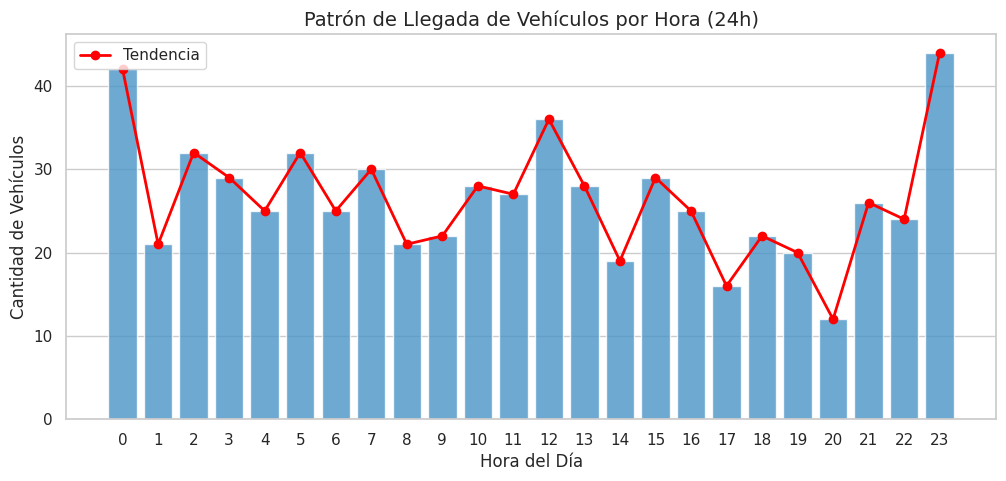

Media (Promedio): 2.2950 minutos/vehículo
Desviación Estándar: 2.3549 minutos


In [100]:
df_llegadas['Hora'] = df_llegadas['FECHA_HORA_INGRESO_AL_CAFSR'].dt.hour
conteo_hora = df_llegadas['Hora'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=conteo_hora.index, y=conteo_hora.values, color="#3498db", alpha=0.8)
plt.plot(conteo_hora.index, conteo_hora.values, color='red', marker='o', linestyle='-', linewidth=2, label='Tendencia')

plt.title("Patrón de Llegada de Vehículos por Hora (24h)", fontsize=14)
plt.xlabel("Hora del Día", fontsize=12)
plt.ylabel("Cantidad de Vehículos", fontsize=12)
plt.legend()
plt.show()

media_llegadas = np.mean(data_llegadas)
std_llegadas = np.std(data_llegadas)
print(f"Media (Promedio): {media_llegadas:.4f} minutos/vehículo")
print(f"Desviación Estándar: {std_llegadas:.4f} minutos")

/usr/local/lib/python3.12/dist-packages/distfit/distfit.py:1324: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticks, fontsize=fontsize)


<Figure size 1000x600 with 0 Axes>

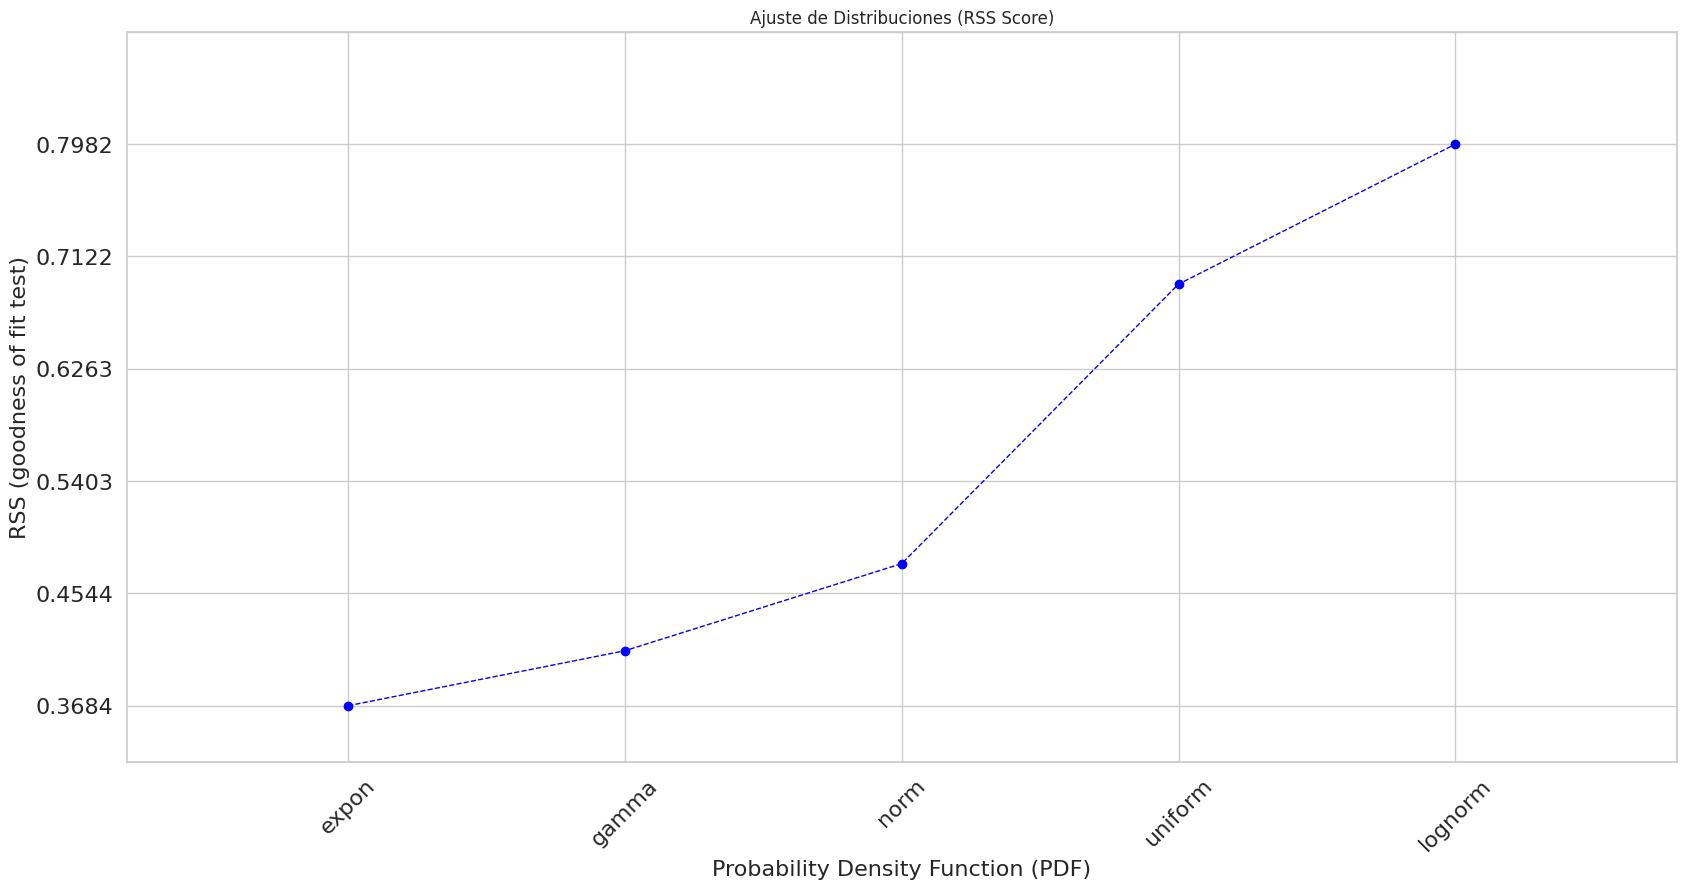

In [101]:
dfit = distfit(distr=['norm', 'expon', 'gamma', 'lognorm', 'uniform'], verbose=0)
result = dfit.fit_transform(data_llegadas)

plt.figure(figsize=(10, 6))
dfit.plot_summary()
plt.title("Ajuste de Distribuciones (RSS Score)")
plt.show()

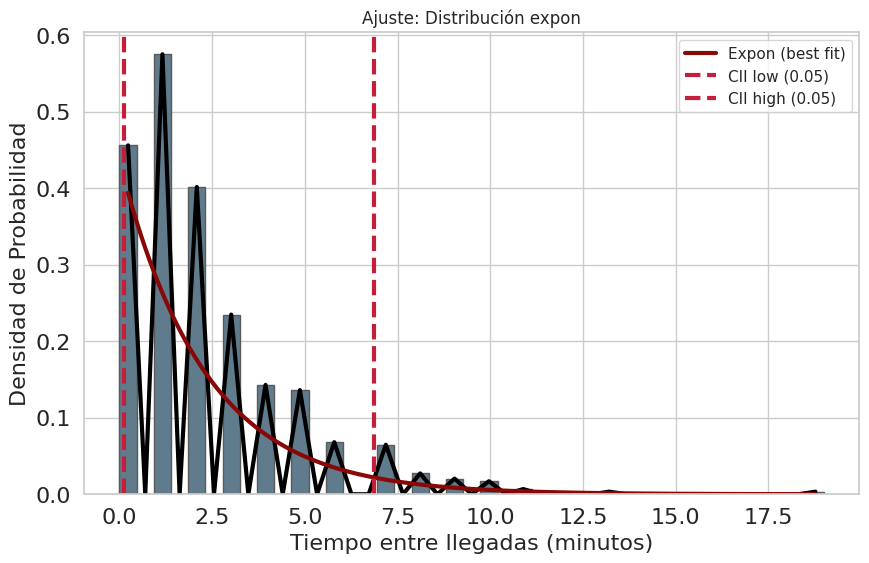

Distribución: expon
Parámetros: (0.0, 2.2949526813880126)
Score (RSS): 0.36842802618782877

Intervalo de Confianza (95%) de la Media Real: [2.1116, 2.4783]


In [102]:
fig, ax = plt.subplots(figsize=(10, 6))
dfit.plot(chart='PDF', n_top=1, ax=ax)
plt.title(f"Ajuste: Distribución {dfit.model['name']}")
plt.xlabel("Tiempo entre llegadas (minutos)")
plt.ylabel("Densidad de Probabilidad")
plt.show()

print(f"Distribución: {dfit.model['name']}")
print(f"Parámetros: {dfit.model['params']}")
print(f"Score (RSS): {dfit.model['score']}")

lim_inf = media_llegadas - 1.96 * (std_llegadas / np.sqrt(len(data_llegadas)))
lim_sup = media_llegadas + 1.96 * (std_llegadas / np.sqrt(len(data_llegadas)))

print(f"\nIntervalo de Confianza (95%) de la Media Real: [{lim_inf:.4f}, {lim_sup:.4f}]")

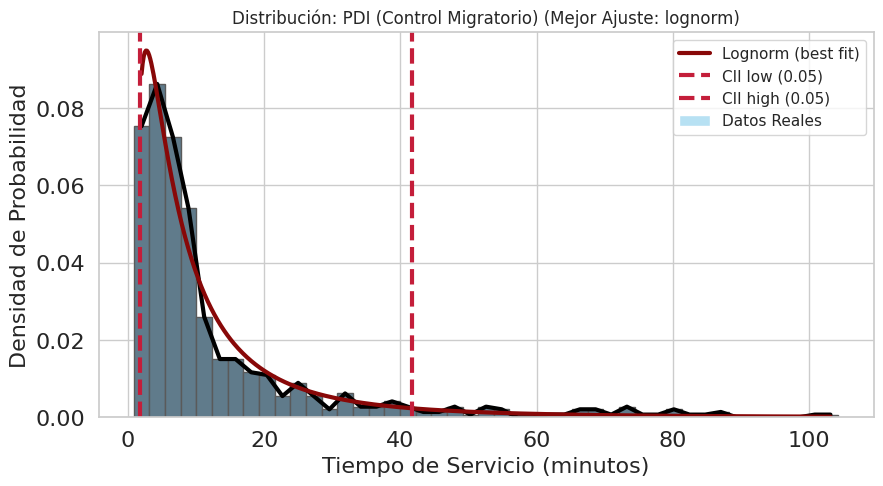

RESULTADOS ESTADÍSTICOS:
   - Media muestral: 13.0360 min
   - Desviación Estándar: 16.3610 min
   - Intervalo de Confianza (95%): [11.7635 - 14.3086]
MODELO: lognorm
   - Parámetros: (np.float64(1.0803363888677244), 0.5186201895728053, np.float64(6.970630525599045))
   - Error (RSS): 0.0006


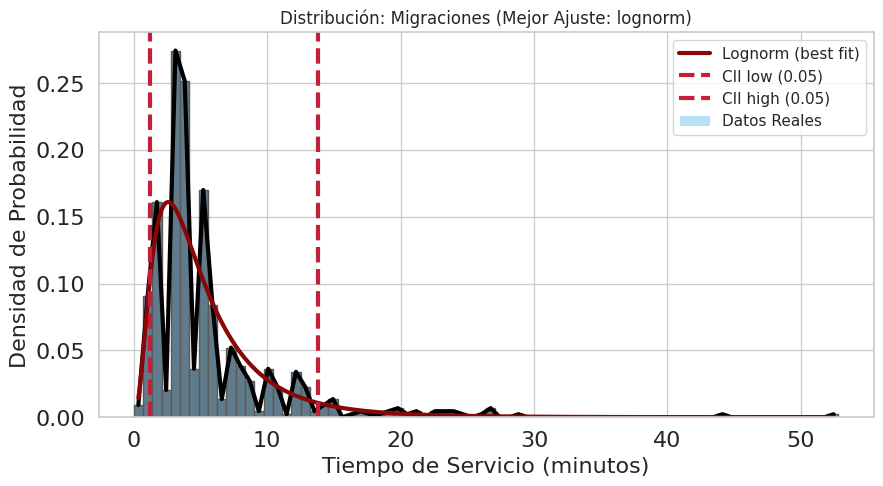

RESULTADOS ESTADÍSTICOS:
   - Media muestral: 5.5878 min
   - Desviación Estándar: 5.1520 min
   - Intervalo de Confianza (95%): [5.1871 - 5.9886]
MODELO: lognorm
   - Parámetros: (np.float64(0.6830630091168123), -0.29224486170614083, np.float64(4.581470102345258))
   - Error (RSS): 0.0637


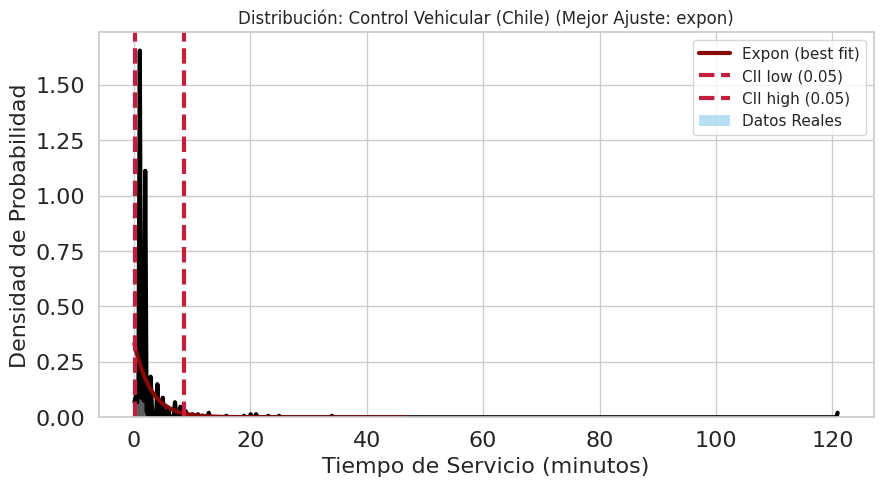

RESULTADOS ESTADÍSTICOS:
   - Media muestral: 2.8911 min
   - Desviación Estándar: 8.7144 min
   - Intervalo de Confianza (95%): [2.2133 - 3.5689]
MODELO: expon
   - Parámetros: (0.0, 2.891102362204724)
   - Error (RSS): 3.2191


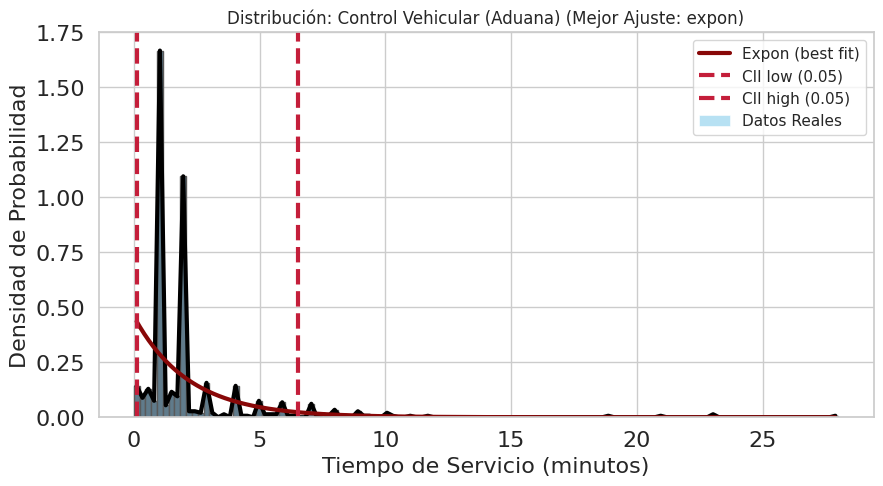

RESULTADOS ESTADÍSTICOS:
   - Media muestral: 2.1757 min
   - Desviación Estándar: 2.6269 min
   - Intervalo de Confianza (95%): [1.9714 - 2.3800]
MODELO: expon
   - Parámetros: (0.0, 2.1756955380577425)
   - Error (RSS): 3.1930


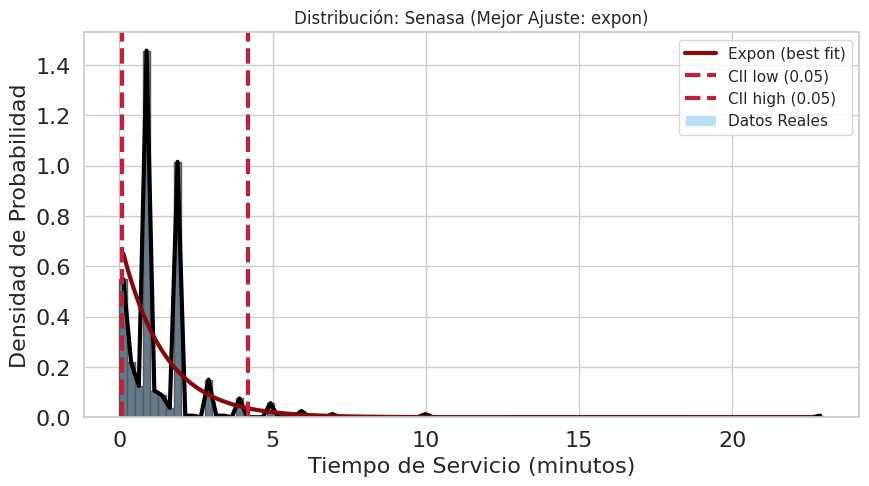

RESULTADOS ESTADÍSTICOS:
   - Media muestral: 1.4029 min
   - Desviación Estándar: 1.4550 min
   - Intervalo de Confianza (95%): [1.2897 - 1.5161]
MODELO: expon
   - Parámetros: (0.0, 1.4029133858267717)
   - Error (RSS): 2.2583


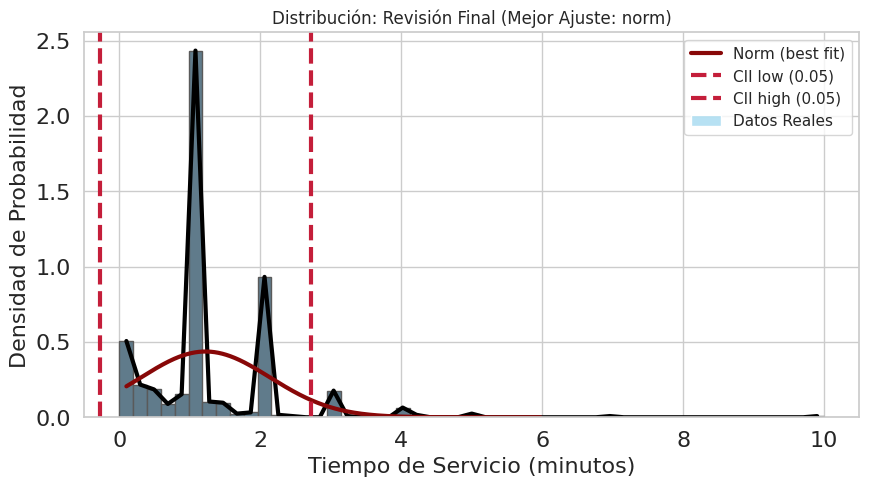

RESULTADOS ESTADÍSTICOS:
   - Media muestral: 1.2212 min
   - Desviación Estándar: 0.9144 min
   - Intervalo de Confianza (95%): [1.1501 - 1.2924]
MODELO: norm
   - Parámetros: (np.float64(1.221233595800525), np.float64(0.9144127195765955))
   - Error (RSS): 5.2400


In [103]:
import datetime

estaciones = {
    'PDI (Control Migratorio)': 'DEMORA_PDI',
    'Migraciones': 'DEMORA_MIGRA',
    'Control Vehicular (Chile)': 'DEMORA_CV_CHI',
    'Control Vehicular (Aduana)': 'DEMORA_CV_ADU',
    'Senasa': 'DEMORA_SEN',
    'Revisión Final': 'DEMORA_REVI'
}

dfit = distfit(distr=['norm', 'expon', 'gamma', 'lognorm', 'uniform'], verbose=0)

for nombre_estacion, columna in estaciones.items():

    if columna not in df.columns:
        continue

    data_raw = df[columna].apply(procesar_tiempo_minutos)
    data_clean = data_raw.dropna()

    if len(data_clean) == 0:
        print("No hay datos válidos para esta columna.")
        continue

    dfit.fit_transform(data_clean)

    mejor_dist = dfit.model['name']
    params = dfit.model['params']
    score = dfit.model['score']

    fig, ax = plt.subplots(figsize=(10, 5))

    sns.histplot(data_clean, stat="density", color="skyblue", label="Datos Reales", alpha=0.6, ax=ax)

    dfit.plot(chart='PDF', n_top=1, ax=ax)

    ax.set_title(f"Distribución: {nombre_estacion} (Mejor Ajuste: {mejor_dist})")
    ax.set_xlabel("Tiempo de Servicio (minutos)")
    ax.set_ylabel("Densidad de Probabilidad")
    plt.show()

    media = np.mean(data_clean)
    desv = np.std(data_clean)

    z_score = 1.96
    error_estandar = desv / np.sqrt(len(data_clean))
    ic_inf = media - (z_score * error_estandar)
    ic_sup = media + (z_score * error_estandar)

    print(f"RESULTADOS ESTADÍSTICOS:")
    print(f"   - Media muestral: {media:.4f} min")
    print(f"   - Desviación Estándar: {desv:.4f} min")
    print(f"   - Intervalo de Confianza (95%): [{ic_inf:.4f} - {ic_sup:.4f}]")
    print(f"MODELO: {mejor_dist}")
    print(f"   - Parámetros: {params}")
    print(f"   - Error (RSS): {score:.4f}")

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import lognorm, expon, norm, t

rng = np.random.default_rng(42)

def generar_variables_aleatorias(num_vehiculos, factor_demanda=1.0):

    MEDIA_LLEGADA_BASE = 2.29

    media_ajustada = MEDIA_LLEGADA_BASE / factor_demanda

    t_llegadas = expon.rvs(scale=media_ajustada, size=num_vehiculos, random_state=rng)

    t_pdi = lognorm.rvs(s=1.0803, loc=0.5186, scale=6.9706, size=num_vehiculos, random_state=rng)

    t_migra = lognorm.rvs(s=0.6830, loc=-0.2922, scale=4.5814, size=num_vehiculos, random_state=rng)

    t_cv_chile = expon.rvs(scale=2.8911, size=num_vehiculos, random_state=rng)
    t_cv_aduana = expon.rvs(scale=2.1756, size=num_vehiculos, random_state=rng)
    t_senasa = expon.rvs(scale=1.4029, size=num_vehiculos, random_state=rng)

    t_revi = np.abs(norm.rvs(loc=1.2212, scale=0.9144, size=num_vehiculos, random_state=rng))

    return {
        'llegadas': t_llegadas,
        'PDI': t_pdi, 'MIGRA': t_migra,
        'CV': t_cv_chile + t_cv_aduana + t_senasa,
        'REVI': t_revi
    }

In [105]:
def motor_simulacion_replica(recursos, factor_demanda=1.0):

    MEDIA_BASE = 2.29
    media_actual = MEDIA_BASE / factor_demanda

    num_vehiculos_estimados = int(1440 / media_actual)

    datos = generar_variables_aleatorias(num_vehiculos_estimados, factor_demanda)
    reloj_llegadas = np.cumsum(datos['llegadas'])

    servers = {
        'PDI': [0.0] * recursos['PDI'],
        'MIGRA': [0.0] * recursos['MIGRA'],
        'CV': [0.0] * recursos['CV'],
        'REVI': [0.0] * recursos['REVI']
    }

    tiempos_sistema = []
    tiempos_cola = []
    fin_ultimo = 0

    for i in range(num_vehiculos_estimados):
        if reloj_llegadas[i] > 1440:
            break

        # PDI
        llegada = reloj_llegadas[i]
        servers['PDI'].sort()
        inicio = max(llegada, servers['PDI'][0])
        fin = inicio + datos['PDI'][i]
        servers['PDI'][0] = fin
        cola = inicio - llegada

        # MIGRACIONES
        llegada = fin
        servers['MIGRA'].sort()
        inicio = max(llegada, servers['MIGRA'][0])
        fin = inicio + datos['MIGRA'][i]
        servers['MIGRA'][0] = fin
        cola += (inicio - llegada)

        # CONTROL VEHICULAR
        llegada = fin
        servers['CV'].sort()
        inicio = max(llegada, servers['CV'][0])
        fin = inicio + datos['CV'][i]
        servers['CV'][0] = fin
        cola += (inicio - llegada)

        # REVISION
        llegada = fin
        servers['REVI'].sort()
        inicio = max(llegada, servers['REVI'][0])
        fin = inicio + datos['REVI'][i]
        servers['REVI'][0] = fin
        cola += (inicio - llegada)

        tiempos_sistema.append(fin - reloj_llegadas[i])
        tiempos_cola.append(cola)

        if fin > fin_ultimo: fin_ultimo = fin

    df_replica = pd.DataFrame({'Tiempo_Sistema': tiempos_sistema, 'Tiempo_Cola': tiempos_cola})

    serie_movil = pd.Series(tiempos_sistema).expanding().mean()

    duracion_real = fin_ultimo - reloj_llegadas[0]

    vehiculos_procesados = len(df_replica)

    return df_replica, serie_movil, duracion_real, vehiculos_procesados

In [106]:
import pandas as pd
import numpy as np
import datetime

def minutos_a_reloj(minutos_float):
    segundos_totales = int(minutos_float * 60)
    td = datetime.timedelta(seconds=segundos_totales)
    tiempo_base = datetime.datetime(2023, 1, 1) + td
    return tiempo_base.strftime("%H:%M:%S")

n_vehiculos = 635
recursos = {'PDI': 19, 'MIGRA': 24, 'CV': 6, 'REVI': 2}
factor_demanda = 1.0

media_base = 2.2949 / factor_demanda
num_estimado = int(1440 / media_base)
datos = generar_variables_aleatorias(num_estimado, factor_demanda)
reloj_llegadas = np.cumsum(datos['llegadas'])

s_pdi = [0.0] * recursos['PDI']
s_mig = [0.0] * recursos['MIGRA']
s_cv  = [0.0] * recursos['CV']
s_rev = [0.0] * recursos['REVI']

registros = []

for i in range(len(reloj_llegadas)):
    if reloj_llegadas[i] > 1440: break

    llegada = reloj_llegadas[i]
    s_pdi.sort()
    inicio_pdi = max(llegada, s_pdi[0])
    fin_pdi = inicio_pdi + datos['PDI'][i]
    s_pdi[0] = fin_pdi

    llegada = fin_pdi
    s_mig.sort()
    inicio_mig = max(llegada, s_mig[0])
    fin_mig = inicio_mig + datos['MIGRA'][i]
    s_mig[0] = fin_mig

    llegada = fin_mig
    s_cv.sort()
    inicio_cv = max(llegada, s_cv[0])
    fin_cv = inicio_cv + datos['CV'][i]
    s_cv[0] = fin_cv

    llegada = fin_cv
    s_rev.sort()
    inicio_rev = max(llegada, s_rev[0])
    fin_rev = inicio_rev + datos['REVI'][i]
    s_rev[0] = fin_rev

    registros.append({
        'Vehiculo': i+1,
        'Llegada': reloj_llegadas[i],
        'Ini_PDI': inicio_pdi,   'Fin_PDI': fin_pdi,
        'Ini_Migra': inicio_mig, 'Fin_Migra': fin_mig,
        'Ini_CV': inicio_cv,     'Fin_CV': fin_cv,
        'Ini_Revi': inicio_rev,  'Fin_Revi': fin_rev,
        'Tiempo_Total_Min': fin_rev - reloj_llegadas[i]
    })

df_traza = pd.DataFrame(registros)

cols_tiempo = [
    'Llegada',
    'Ini_PDI', 'Fin_PDI',
    'Ini_Migra', 'Fin_Migra',
    'Ini_CV', 'Fin_CV',
    'Ini_Revi', 'Fin_Revi'
]

df_visual = df_traza.copy()

for col in cols_tiempo:
    df_visual[col] = df_visual[col].apply(minutos_a_reloj)

df_visual['Tiempo_Total_Min'] = df_visual['Tiempo_Total_Min'].round(2)

display(df_visual.head(15))

,Vehiculo,Llegada,Ini_PDI,Fin_PDI,Ini_Migra,Fin_Migra,Ini_CV,Fin_CV,Ini_Revi,Fin_Revi,Tiempo_Total_Min
0,1,00:05:30,00:05:30,00:21:05,00:21:05,00:23:59,00:23:59,00:31:18,00:31:18,00:31:39,26.16
1,2,00:10:51,00:10:51,00:20:25,00:20:25,00:29:29,00:29:29,00:41:28,00:41:28,00:41:52,31.01
2,3,00:16:18,00:16:18,00:20:25,00:20:25,00:24:55,00:24:55,00:32:25,00:32:25,00:34:03,17.75
3,4,00:16:57,00:16:57,00:50:54,00:50:54,00:54:04,00:54:04,00:57:04,00:57:04,00:58:13,41.27
4,5,00:17:09,00:17:09,00:22:00,00:22:00,00:23:02,00:23:02,00:27:57,00:41:52,00:42:22,25.22
5,6,00:20:28,00:20:28,00:28:13,00:28:13,00:31:59,00:31:59,00:36:22,00:42:22,00:43:56,23.45
6,7,00:23:42,00:23:42,00:33:32,00:33:32,00:34:50,00:34:50,00:36:54,00:43:56,00:44:24,20.70
7,8,00:30:51,00:30:51,00:34:57,00:34:57,00:43:31,00:43:31,00:51:33,00:51:33,00:51:55,21.05
8,9,00:31:02,00:31:02,00:43:09,00:43:09,00:55:46,00:55:46,01:06:32,01:06:32,01:08:59,37.95
9,10,00:33:26,00:33:26,00:37:52,00:37:52,00:40:14,00:40:14,00:46:13,00:58:13,01:01:06,27.67


# Escenario A: Base

In [107]:
NOMBRE_ESCENARIO = "Escenario A: Caso Base (Demanda Normal)"
NUM_REPLICAS = 1000
FACTOR_DEMANDA = 1.0
RECURSOS_CONFIG = {
    'PDI': 19, 'MIGRA': 24, 'CV': 6, 'REVI': 2
}

print(f"Configuración: {NOMBRE_ESCENARIO}")
print(f"Factor Demanda: {FACTOR_DEMANDA}x")
print(f"Recursos: {RECURSOS_CONFIG}")

Configuración: Escenario A: Caso Base (Demanda Normal)
Factor Demanda: 1.0x
Recursos: {'PDI': 19, 'MIGRA': 24, 'CV': 6, 'REVI': 2}


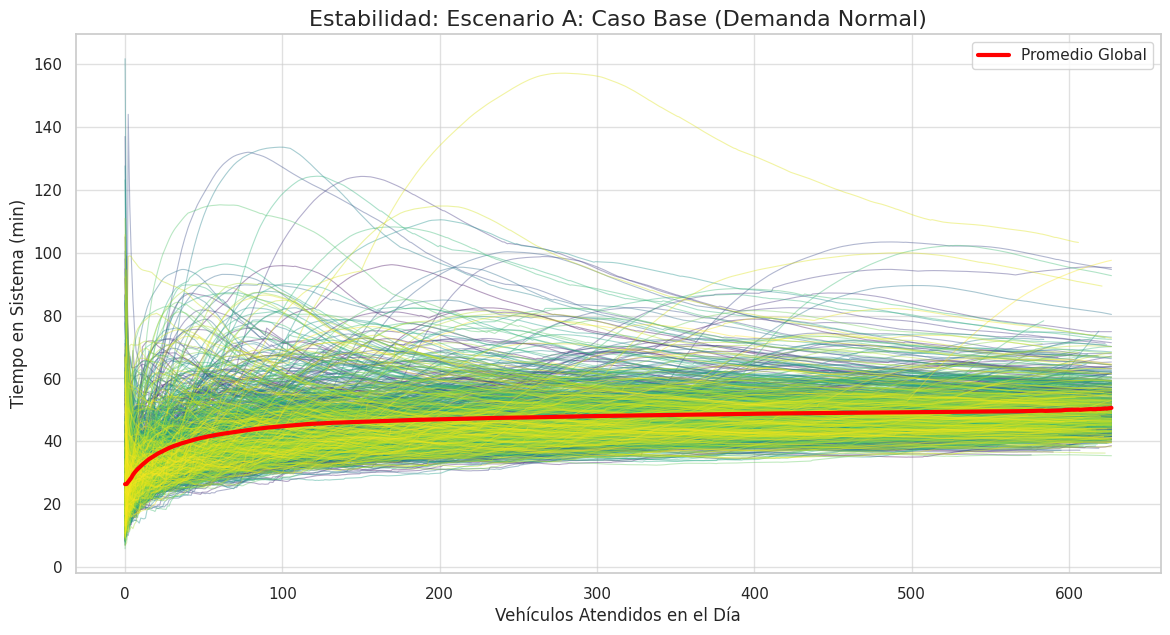

RESULTADOS: Escenario A: Caso Base (Demanda Normal)
(Promedio de vehículos atendidos por día: 618)
Tiempo en Sistema (min):
   Media: 49.74 | Desv: 7.93 | IC 95%: [49.25, 50.23]
Tiempo en Cola (min):
   Media: 23.45 | Desv: 7.35 | IC 95%: [22.99, 23.91]
N° en Cola (veh):
   Media: 9.74 | Desv: 3.10 | IC 95%: [9.55, 9.93]


In [108]:
trayectorias = []
metricas = []
total_vehiculos_dia = []

for n in range(NUM_REPLICAS):
    df_res, serie_movil, duracion, n_autos = motor_simulacion_replica(RECURSOS_CONFIG, FACTOR_DEMANDA)

    trayectorias.append(serie_movil)
    total_vehiculos_dia.append(n_autos)

    w_sis = df_res['Tiempo_Sistema'].mean()
    w_col = df_res['Tiempo_Cola'].mean()
    lambda_eff = n_autos / duracion
    l_col = lambda_eff * w_col

    metricas.append({'W_Sistema': w_sis, 'W_Cola': w_col, 'L_Cola': l_col})

df_final = pd.DataFrame(metricas)
promedio_autos = np.mean(total_vehiculos_dia)

plt.figure(figsize=(14, 7))
colores = cm.viridis(np.linspace(0, 1, NUM_REPLICAS))

for i, tray in enumerate(trayectorias):
    plt.plot(tray, color=colores[i], linewidth=0.8, alpha=0.4)

promedio_global = pd.concat(trayectorias, axis=1).mean(axis=1)
plt.plot(promedio_global, color='red', linewidth=3, label='Promedio Global')

plt.title(f"Estabilidad: {NOMBRE_ESCENARIO}", fontsize=16)
plt.xlabel("Vehículos Atendidos en el Día", fontsize=12)
plt.ylabel("Tiempo en Sistema (min)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

def print_stats(datos, nombre):
    media = np.mean(datos)
    desv = np.std(datos, ddof=1)
    n = len(datos)
    error = t.ppf(0.975, n-1) * (desv/np.sqrt(n))
    print(f"{nombre}:")
    print(f"   Media: {media:.2f} | Desv: {desv:.2f} | IC 95%: [{media-error:.2f}, {media+error:.2f}]")
    return media

print(f"RESULTADOS: {NOMBRE_ESCENARIO}")
print(f"(Promedio de vehículos atendidos por día: {int(promedio_autos)})")

res_sis = print_stats(df_final['W_Sistema'], "Tiempo en Sistema (min)")
res_col = print_stats(df_final['W_Cola'], "Tiempo en Cola (min)")
res_lq  = print_stats(df_final['L_Cola'], "N° en Cola (veh)")

resultado_escenario_A = {
    'Escenario': 'A (Base)',
    'W_Sistema': res_sis,
    'Data_Boxplot': df_final['W_Sistema'].values
}

# Escenario B

In [109]:
NOMBRE_ESCENARIO = "Escenario B: Alta Demanda (Doble Flujo)"
NUM_REPLICAS = 1000
FACTOR_DEMANDA = 2.0
RECURSOS_CONFIG = {
    'PDI': 19, 'MIGRA': 24, 'CV': 6, 'REVI': 2
}

print(f"Configuración: {NOMBRE_ESCENARIO}")
print(f"Factor Demanda: {FACTOR_DEMANDA}x")
print(f"Recursos: {RECURSOS_CONFIG}")

Configuración: Escenario B: Alta Demanda (Doble Flujo)
Factor Demanda: 2.0x
Recursos: {'PDI': 19, 'MIGRA': 24, 'CV': 6, 'REVI': 2}


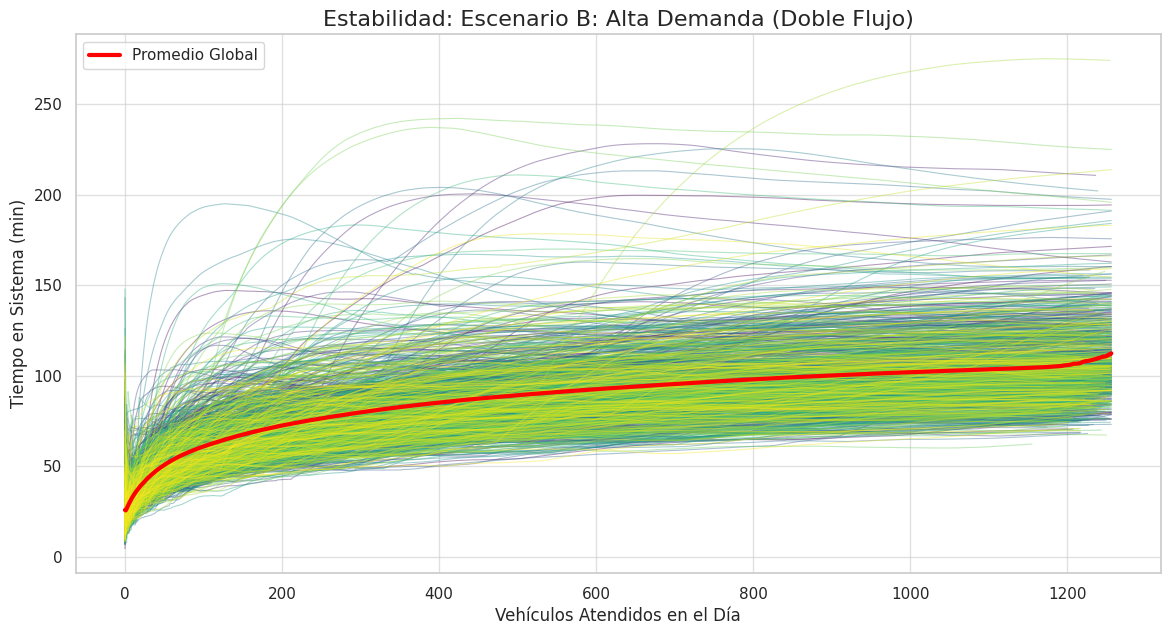

RESULTADOS: Escenario B: Alta Demanda (Doble Flujo)
(Promedio de vehículos atendidos por día: 1243)
Tiempo en Sistema (min):
   Media: 105.68 | Desv: 22.31 | IC 95%: [104.29, 107.06]
Tiempo en Cola (min):
   Media: 79.41 | Desv: 22.01 | IC 95%: [78.04, 80.77]
N° en Cola (veh):
   Media: 63.38 | Desv: 17.41 | IC 95%: [62.30, 64.46]


In [110]:
trayectorias = []
metricas = []
total_vehiculos_dia = []

for n in range(NUM_REPLICAS):
    df_res, serie_movil, duracion, n_autos = motor_simulacion_replica(RECURSOS_CONFIG, FACTOR_DEMANDA)

    trayectorias.append(serie_movil)
    total_vehiculos_dia.append(n_autos)

    w_sis = df_res['Tiempo_Sistema'].mean()
    w_col = df_res['Tiempo_Cola'].mean()

    lambda_eff = n_autos / duracion
    l_col = lambda_eff * w_col

    metricas.append({'W_Sistema': w_sis, 'W_Cola': w_col, 'L_Cola': l_col})

df_final_B = pd.DataFrame(metricas)
promedio_autos = np.mean(total_vehiculos_dia)

plt.figure(figsize=(14, 7))
colores = cm.viridis(np.linspace(0, 1, NUM_REPLICAS))

for i, tray in enumerate(trayectorias):
    plt.plot(tray, color=colores[i], linewidth=0.8, alpha=0.4)

promedio_global = pd.concat(trayectorias, axis=1).mean(axis=1)
plt.plot(promedio_global, color='red', linewidth=3, label='Promedio Global')

plt.title(f"Estabilidad: {NOMBRE_ESCENARIO}", fontsize=16)
plt.xlabel("Vehículos Atendidos en el Día", fontsize=12)
plt.ylabel("Tiempo en Sistema (min)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

print(f"RESULTADOS: {NOMBRE_ESCENARIO}")
print(f"(Promedio de vehículos atendidos por día: {int(promedio_autos)})")

res_sis_B = print_stats(df_final_B['W_Sistema'], "Tiempo en Sistema (min)")
res_col_B = print_stats(df_final_B['W_Cola'], "Tiempo en Cola (min)")
res_lq_B  = print_stats(df_final_B['L_Cola'], "N° en Cola (veh)")

resultado_escenario_B = {
    'Escenario': 'B (Alta Demanda)',
    'W_Sistema': res_sis_B,
    'Data_Boxplot': df_final_B['W_Sistema'].values
}

# Escenario C

In [111]:
NOMBRE_ESCENARIO = "Escenario C: Alta Demanda + Refuerzo (PDI+3, Migra+3)"
NUM_REPLICAS = 1000
FACTOR_DEMANDA = 2.0
RECURSOS_CONFIG = {
    'PDI': 22,    # 19 + 3
    'MIGRA': 27,  # 24 + 3
    'CV': 6,      # Igual
    'REVI': 2     # Igual
}

print(f"Configuración: {NOMBRE_ESCENARIO}")
print(f"Factor Demanda: {FACTOR_DEMANDA}x")
print(f"Recursos: {RECURSOS_CONFIG}")

Configuración: Escenario C: Alta Demanda + Refuerzo (PDI+3, Migra+3)
Factor Demanda: 2.0x
Recursos: {'PDI': 22, 'MIGRA': 27, 'CV': 6, 'REVI': 2}


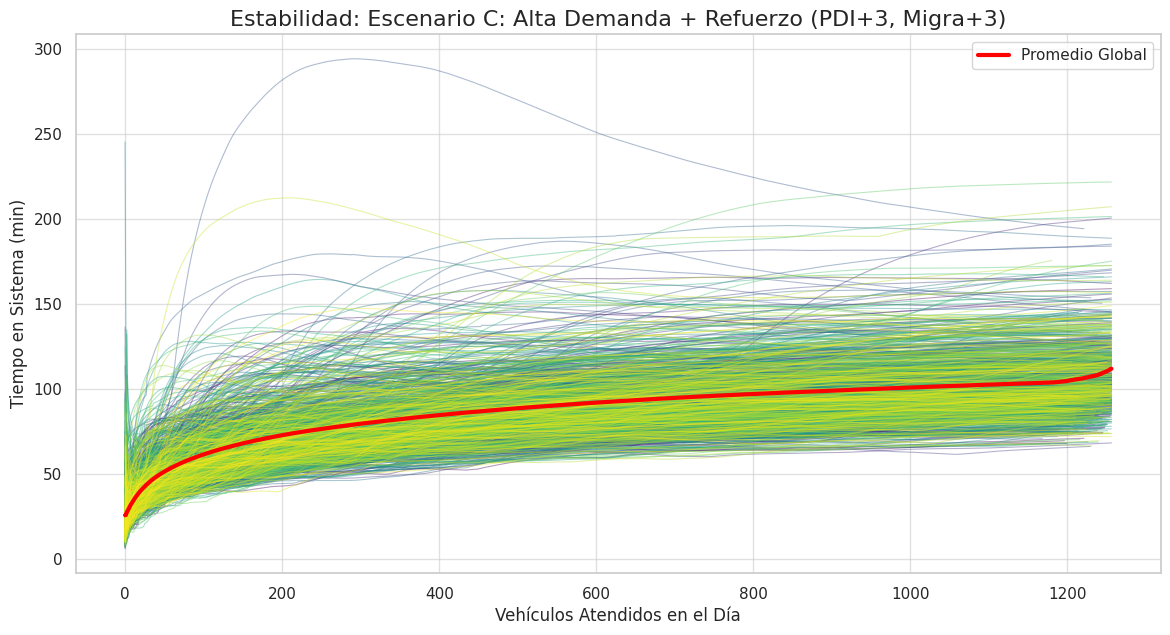

RESULTADOS: Escenario C: Alta Demanda + Refuerzo (PDI+3, Migra+3)
(Promedio de vehículos atendidos por día: 1242)
Tiempo en Sistema (min):
   Media: 104.63 | Desv: 20.75 | IC 95%: [103.34, 105.91]
Tiempo en Cola (min):
   Media: 78.35 | Desv: 20.46 | IC 95%: [77.08, 79.62]
N° en Cola (veh):
   Media: 62.60 | Desv: 16.35 | IC 95%: [61.58, 63.61]


In [112]:
trayectorias = []
metricas = []
total_vehiculos_dia = []


for n in range(NUM_REPLICAS):
    df_res, serie_movil, duracion, n_autos = motor_simulacion_replica(RECURSOS_CONFIG, FACTOR_DEMANDA)

    trayectorias.append(serie_movil)
    total_vehiculos_dia.append(n_autos)

    w_sis = df_res['Tiempo_Sistema'].mean()
    w_col = df_res['Tiempo_Cola'].mean()

    lambda_eff = n_autos / duracion
    l_col = lambda_eff * w_col

    metricas.append({'W_Sistema': w_sis, 'W_Cola': w_col, 'L_Cola': l_col})

df_final_C = pd.DataFrame(metricas)
promedio_autos = np.mean(total_vehiculos_dia)

plt.figure(figsize=(14, 7))
colores = cm.viridis(np.linspace(0, 1, NUM_REPLICAS))

for i, tray in enumerate(trayectorias):
    plt.plot(tray, color=colores[i], linewidth=0.8, alpha=0.4)

promedio_global = pd.concat(trayectorias, axis=1).mean(axis=1)
plt.plot(promedio_global, color='red', linewidth=3, label='Promedio Global')

plt.title(f"Estabilidad: {NOMBRE_ESCENARIO}", fontsize=16)
plt.xlabel("Vehículos Atendidos en el Día", fontsize=12)
plt.ylabel("Tiempo en Sistema (min)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

print(f"RESULTADOS: {NOMBRE_ESCENARIO}")
print(f"(Promedio de vehículos atendidos por día: {int(promedio_autos)})")

res_sis = print_stats(df_final_C['W_Sistema'], "Tiempo en Sistema (min)")
res_col = print_stats(df_final_C['W_Cola'], "Tiempo en Cola (min)")
res_lq  = print_stats(df_final_C['L_Cola'], "N° en Cola (veh)")

resultado_escenario_C = {
    'Escenario': 'C (Refuerzo PDI/Migra)',
    'W_Sistema': res_sis,
    'Data_Boxplot': df_final_C['W_Sistema'].values
}

# Escenario D

In [113]:
NOMBRE_ESCENARIO = "Escenario D: Alta Demanda + Refuerzo Total (+CV, +REVI)"
NUM_REPLICAS = 1000
FACTOR_DEMANDA = 2.0
RECURSOS_CONFIG = {
    'PDI': 22,    # Mantenemos refuerzo
    'MIGRA': 27,  # Mantenemos refuerzo
    'CV': 9,      # Antes 6 (Aumento +3)
    'REVI': 5     # Antes 2 (Aumento +3)
}

print(f"Configuración: {NOMBRE_ESCENARIO}")
print(f"Factor Demanda: {FACTOR_DEMANDA}x")
print(f"Recursos: {RECURSOS_CONFIG}")

Configuración: Escenario D: Alta Demanda + Refuerzo Total (+CV, +REVI)
Factor Demanda: 2.0x
Recursos: {'PDI': 22, 'MIGRA': 27, 'CV': 9, 'REVI': 5}


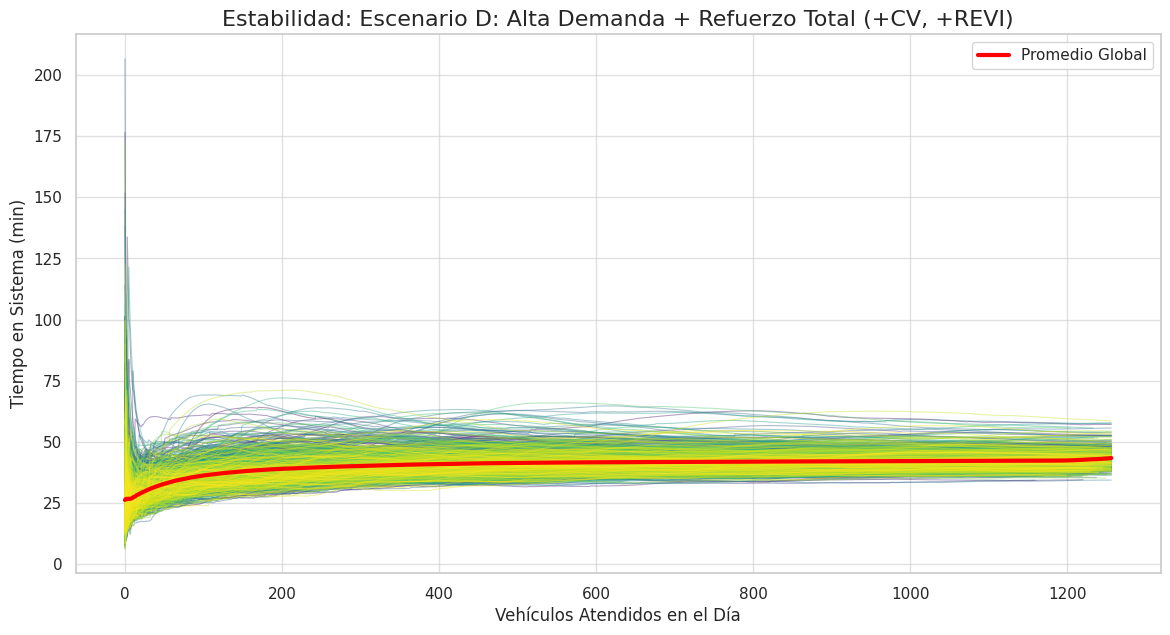

RESULTADOS: Escenario D: Alta Demanda + Refuerzo Total (+CV, +REVI)
(Promedio de vehículos atendidos por día: 1242)
Tiempo en Sistema (min):
   Media: 42.26 | Desv: 3.50 | IC 95%: [42.04, 42.47]
Tiempo en Cola (min):
   Media: 15.99 | Desv: 3.06 | IC 95%: [15.80, 16.18]
N° en Cola (veh):
   Media: 13.10 | Desv: 2.73 | IC 95%: [12.93, 13.26]


In [114]:
trayectorias = []
metricas = []
total_vehiculos_dia = []


for n in range(NUM_REPLICAS):
    df_res, serie_movil, duracion, n_autos = motor_simulacion_replica(RECURSOS_CONFIG, FACTOR_DEMANDA)

    trayectorias.append(serie_movil)
    total_vehiculos_dia.append(n_autos)

    w_sis = df_res['Tiempo_Sistema'].mean()
    w_col = df_res['Tiempo_Cola'].mean()

    lambda_eff = n_autos / duracion
    l_col = lambda_eff * w_col

    metricas.append({'W_Sistema': w_sis, 'W_Cola': w_col, 'L_Cola': l_col})

df_final_D = pd.DataFrame(metricas)
promedio_autos = np.mean(total_vehiculos_dia)

plt.figure(figsize=(14, 7))
colores = cm.viridis(np.linspace(0, 1, NUM_REPLICAS))

for i, tray in enumerate(trayectorias):
    plt.plot(tray, color=colores[i], linewidth=0.8, alpha=0.4)

promedio_global = pd.concat(trayectorias, axis=1).mean(axis=1)
plt.plot(promedio_global, color='red', linewidth=3, label='Promedio Global')

plt.title(f"Estabilidad: {NOMBRE_ESCENARIO}", fontsize=16)
plt.xlabel("Vehículos Atendidos en el Día", fontsize=12)
plt.ylabel("Tiempo en Sistema (min)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

print(f"RESULTADOS: {NOMBRE_ESCENARIO}")
print(f"(Promedio de vehículos atendidos por día: {int(promedio_autos)})")

res_sis_D = print_stats(df_final_D['W_Sistema'], "Tiempo en Sistema (min)")
res_col_D = print_stats(df_final_D['W_Cola'], "Tiempo en Cola (min)")
res_lq_D  = print_stats(df_final_D['L_Cola'], "N° en Cola (veh)")

resultado_escenario_D = {
    'Escenario': 'D (Refuerzo Total)',
    'W_Sistema': res_sis_D,
    'Data_Boxplot': df_final_D['W_Sistema'].values
}

# Escenario E

In [115]:
NOMBRE_ESCENARIO = "Escenario E: Alta Demanda + Optimización (19 PDI, 24 MIG, 9 CV, 5 REV)"

NUM_REPLICAS = 1000
FACTOR_DEMANDA = 2.0

# Recursos
# PDI y MIGRA vuelven a valores base (19, 24)
# CV y REVI se mantienen con el refuerzo alto (9, 5)
RECURSOS_CONFIG = {
    'PDI': 19,
    'MIGRA': 24,
    'CV': 9,
    'REVI': 5
}

print(f"⚙️ Configuración: {NOMBRE_ESCENARIO}")
print(f"   Factor Demanda: {FACTOR_DEMANDA}x")
print(f"   Recursos: {RECURSOS_CONFIG}")

⚙️ Configuración: Escenario E: Alta Demanda + Optimización (19 PDI, 24 MIG, 9 CV, 5 REV)
   Factor Demanda: 2.0x
   Recursos: {'PDI': 19, 'MIGRA': 24, 'CV': 9, 'REVI': 5}


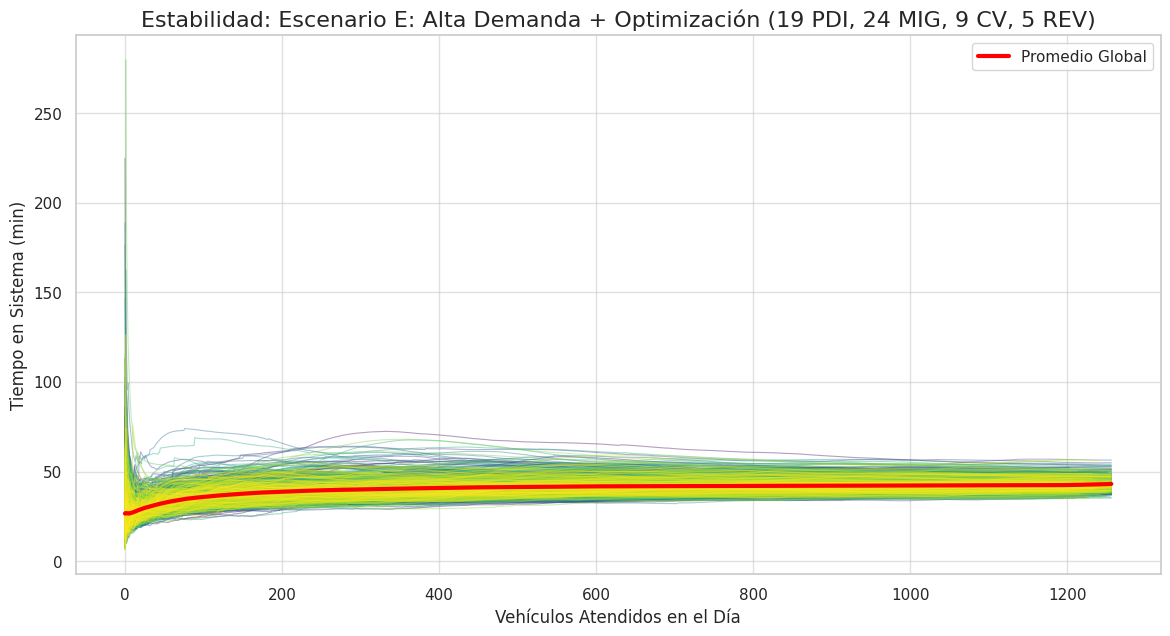

RESULTADOS: Escenario E: Alta Demanda + Optimización (19 PDI, 24 MIG, 9 CV, 5 REV)
(Promedio de vehículos atendidos por día: 1242)
Tiempo en Sistema (min):
   Media: 42.34 | Desv: 3.43 | IC 95%: [42.13, 42.56]
Tiempo en Cola (min):
   Media: 16.06 | Desv: 2.98 | IC 95%: [15.88, 16.25]
N° en Cola (veh):
   Media: 13.12 | Desv: 2.61 | IC 95%: [12.96, 13.28]


In [116]:
trayectorias = []
metricas = []
total_vehiculos_dia = []

for n in range(NUM_REPLICAS):
    df_res, serie_movil, duracion, n_autos = motor_simulacion_replica(RECURSOS_CONFIG, FACTOR_DEMANDA)

    trayectorias.append(serie_movil)
    total_vehiculos_dia.append(n_autos)

    w_sis = df_res['Tiempo_Sistema'].mean()
    w_col = df_res['Tiempo_Cola'].mean()

    lambda_eff = n_autos / duracion
    l_col = lambda_eff * w_col

    metricas.append({'W_Sistema': w_sis, 'W_Cola': w_col, 'L_Cola': l_col})

df_final_E = pd.DataFrame(metricas)
promedio_autos = np.mean(total_vehiculos_dia)

plt.figure(figsize=(14, 7))
colores = cm.viridis(np.linspace(0, 1, NUM_REPLICAS))

for i, tray in enumerate(trayectorias):
    plt.plot(tray, color=colores[i], linewidth=0.8, alpha=0.4)

promedio_global = pd.concat(trayectorias, axis=1).mean(axis=1)
plt.plot(promedio_global, color='red', linewidth=3, label='Promedio Global')

plt.title(f"Estabilidad: {NOMBRE_ESCENARIO}", fontsize=16)
plt.xlabel("Vehículos Atendidos en el Día", fontsize=12)
plt.ylabel("Tiempo en Sistema (min)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

print(f"RESULTADOS: {NOMBRE_ESCENARIO}")
print(f"(Promedio de vehículos atendidos por día: {int(promedio_autos)})")

res_sis_E = print_stats(df_final_E['W_Sistema'], "Tiempo en Sistema (min)")
res_col_E = print_stats(df_final_E['W_Cola'], "Tiempo en Cola (min)")
res_lq_E  = print_stats(df_final_E['L_Cola'], "N° en Cola (veh)")

resultado_escenario_E = {
    'Escenario': 'E (Alta Demanda + Opt)',
    'W_Sistema': res_sis_E,
    'Data_Boxplot': df_final_E['W_Sistema'].values
}

# Conclusiones

In [117]:
data_resumen = []

data_resumen.append({
    'Escenario': 'A: Base (635 Veh)',
    'W_Sistema': df_final['W_Sistema'].mean(),
    'W_Cola': df_final['W_Cola'].mean(),
    'L_Cola': df_final['L_Cola'].mean(),
    'Data_Raw': df_final['W_Sistema'].values
})

data_resumen.append({
    'Escenario': 'B: Demanda Alta (1200 Veh)',
    'W_Sistema': df_final_B['W_Sistema'].mean(),
    'W_Cola': df_final_B['W_Cola'].mean(),
    'L_Cola': df_final_B['L_Cola'].mean(),
    'Data_Raw': df_final_B['W_Sistema'].values
})

data_resumen.append({
    'Escenario': 'C: Demanda Alta (1200 + PDI/Mig)',
    'W_Sistema': df_final_C['W_Sistema'].mean(),
    'W_Cola': df_final_C['W_Cola'].mean(),
    'L_Cola': df_final_C['L_Cola'].mean(),
    'Data_Raw': df_final_C['W_Sistema'].values
})

data_resumen.append({
    'Escenario': 'D: Demanda Alta (1200 + PDI/Mig/CV/Rev)',
    'W_Sistema': df_final_D['W_Sistema'].mean(),
    'W_Cola': df_final_D['W_Cola'].mean(),
    'L_Cola': df_final_D['L_Cola'].mean(),
    'Data_Raw': df_final_D['W_Sistema'].values
})

data_resumen.append({
    'Escenario': 'E: Demanda Alta (1200 + CV/Rev)',
    'W_Sistema': df_final_E['W_Sistema'].mean(),
    'W_Cola': df_final_E['W_Cola'].mean(),
    'L_Cola': df_final_E['L_Cola'].mean(),
    'Data_Raw': df_final_E['W_Sistema'].values
})

df_comp = pd.DataFrame(data_resumen)

print("TABLA DE RESULTADOS GLOBALES (Promedios de 1000 réplicas)")

cols_ver = ['Escenario', 'W_Sistema', 'W_Cola', 'L_Cola']
display(df_comp[cols_ver].round(2))

TABLA DE RESULTADOS GLOBALES (Promedios de 1000 réplicas)


,Escenario,W_Sistema,W_Cola,L_Cola
0,A: Base (635 Veh),49.74,23.45,9.74
1,B: Demanda Alta (1200 Veh),105.68,79.41,63.38
2,C: Demanda Alta (1200 + PDI/Mig),104.63,78.35,62.60
3,D: Demanda Alta (1200 + PDI/Mig/CV/Rev),42.26,15.99,13.10
4,E: Demanda Alta (1200 + CV/Rev),42.34,16.06,13.12


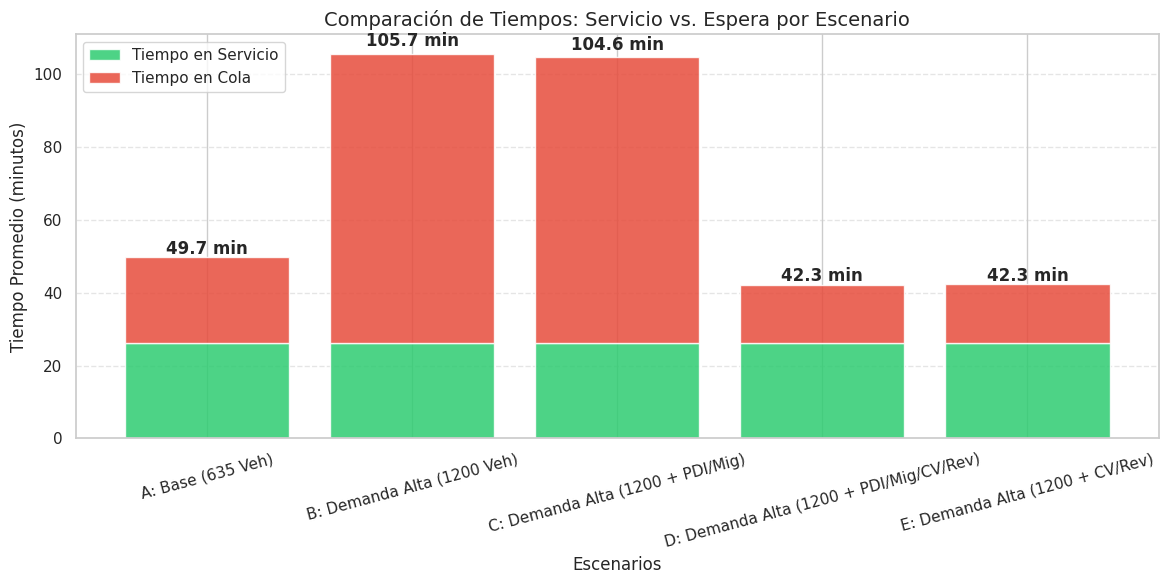

In [118]:
escenarios = df_comp['Escenario']
w_sistema = df_comp['W_Sistema']
w_cola = df_comp['W_Cola']
w_servicio = w_sistema - w_cola

plt.figure(figsize=(12, 6))

plt.bar(escenarios, w_servicio, label='Tiempo en Servicio', color='#2ecc71', alpha=0.85)
plt.bar(escenarios, w_cola, bottom=w_servicio, label='Tiempo en Cola', color='#e74c3c', alpha=0.85)

for i in range(len(escenarios)):
    total = w_sistema[i]
    plt.text(i, total + (total * 0.02), f"{total:.1f} min", ha='center', weight='bold')

plt.title("Comparación de Tiempos: Servicio vs. Espera por Escenario", fontsize=14)
plt.ylabel("Tiempo Promedio (minutos)", fontsize=12)
plt.xlabel("Escenarios", fontsize=12)
plt.xticks(rotation=15)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

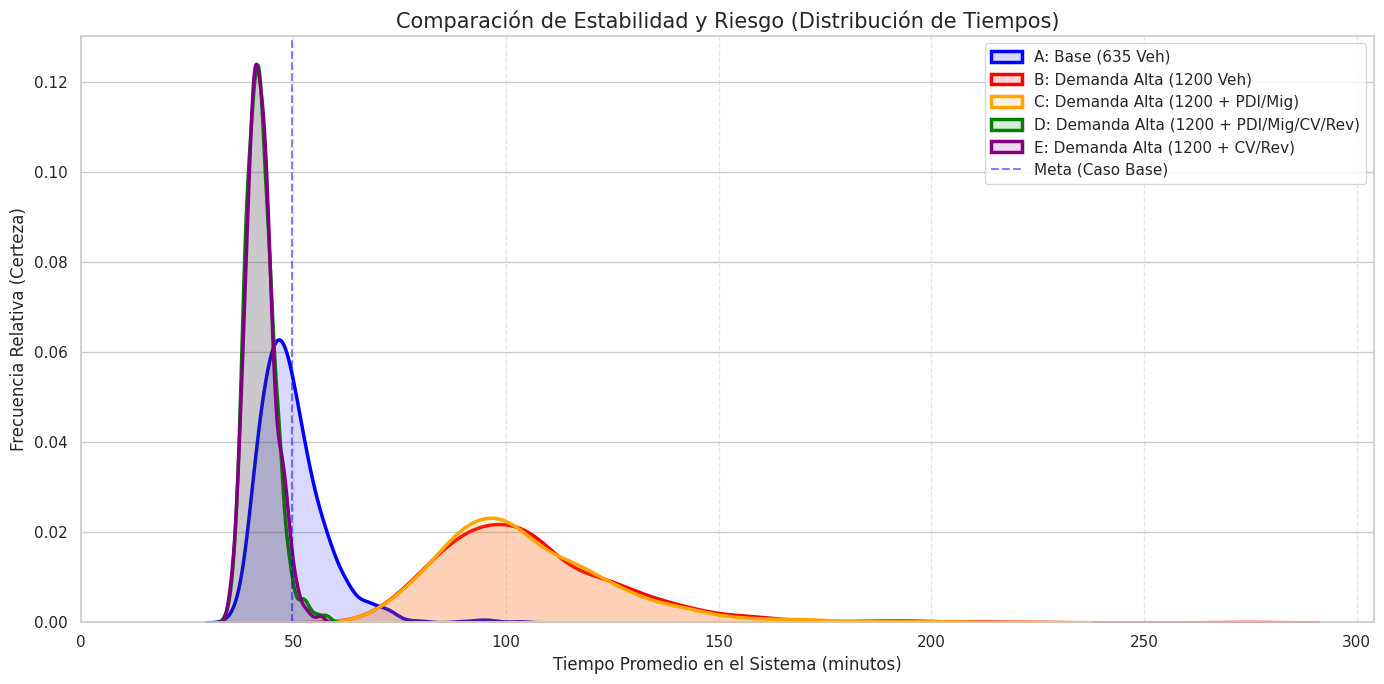

In [119]:
plt.figure(figsize=(14, 7))

paleta = {
    'A': 'blue',
    'B': 'red',
    'C': 'orange',
    'D': 'green',
    'E': 'purple'
}

for index, row in df_comp.iterrows():
    nombre = row['Escenario']
    datos = row['Data_Raw']

    letra = nombre.split(':')[0].strip().replace('Escenario ', '')
    color = paleta.get(letra, 'gray')

    sns.kdeplot(datos, label=nombre, color=color, fill=True, alpha=0.15, linewidth=2.5)

plt.title("Comparación de Estabilidad y Riesgo (Distribución de Tiempos)", fontsize=15)
plt.xlabel("Tiempo Promedio en el Sistema (minutos)", fontsize=12)
plt.ylabel("Frecuencia Relativa (Certeza)", fontsize=12)

base_val = df_comp.iloc[0]['W_Sistema']
plt.axvline(x=base_val, color='blue', linestyle='--', alpha=0.5, label='Meta (Caso Base)')

plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(left=0)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1748935034.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_cajas, labels=etiquetas, patch_artist=True,


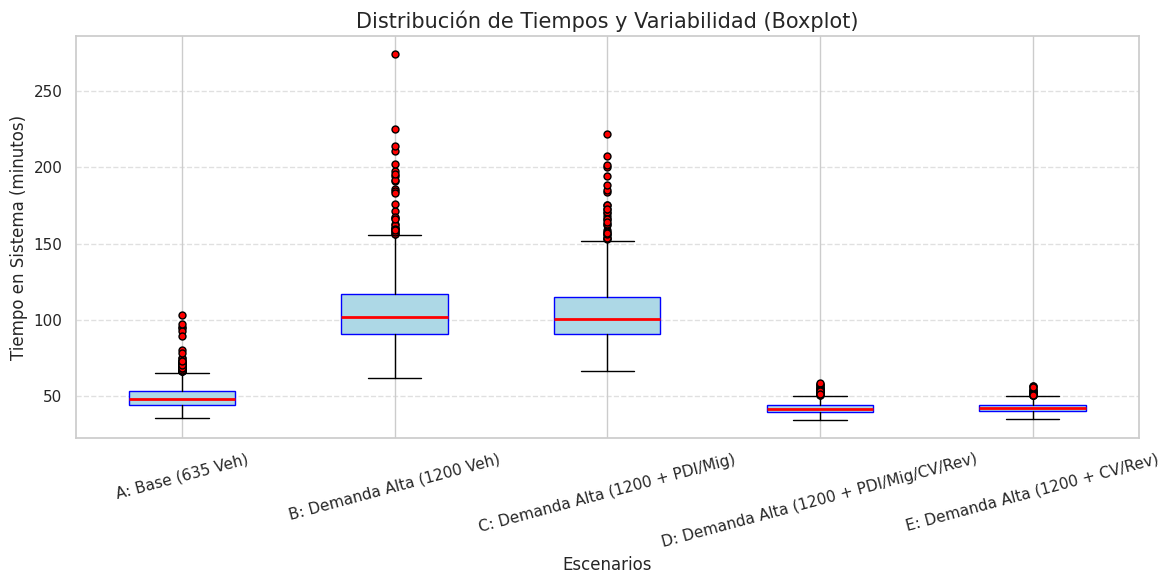

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

datos_cajas = df_comp['Data_Raw'].tolist()
etiquetas = df_comp['Escenario'].tolist()

plt.figure(figsize=(12, 6))

plt.boxplot(datos_cajas, labels=etiquetas, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red", linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5))

plt.title("Distribución de Tiempos y Variabilidad (Boxplot)", fontsize=15)
plt.ylabel("Tiempo en Sistema (minutos)", fontsize=12)
plt.xlabel("Escenarios", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()